In [1]:
from pathlib import Path
import tifffile
import numpy as np
import matplotlib.pyplot as plt


## Merge a section into one image

In [4]:
path = Path("../../data/processed/A")
files = list(path.glob("*.tif"))
files[:5]

[WindowsPath('../../data/processed/A/ExPW021_PW162-A05_Scan1_[10521,30461]_component_data.tif'),
 WindowsPath('../../data/processed/A/ExPW021_PW162-A05_Scan1_[10521,31156]_component_data.tif'),
 WindowsPath('../../data/processed/A/ExPW021_PW162-A05_Scan1_[10521,31851]_component_data.tif'),
 WindowsPath('../../data/processed/A/ExPW021_PW162-A05_Scan1_[10521,32546]_component_data.tif'),
 WindowsPath('../../data/processed/A/ExPW021_PW162-A05_Scan1_[10521,33240]_component_data.tif')]

In [12]:
def extract_locations(path):
    start = path.name.find("_[") + 2
    stop = path.name.find("]_")
    x, y = path.name[start:stop].split(',')
    return int(x), int(y)

locs = np.array([extract_locations(f) for f in files])
locs.shape, locs.dtype

((72, 2), dtype('int32'))

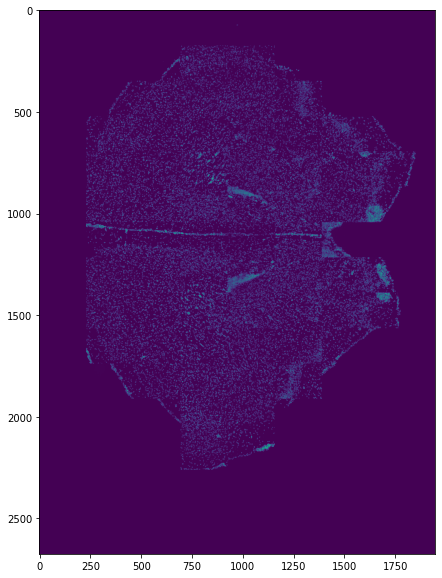

In [77]:
def merge_by_loc(files, locs):
    ptps = locs.ptp(axis=0)
    full = np.zeros(shape=(ptps * 1.4)[::-1].astype(int))
    for f, loc in zip(files, locs):
        x, y = loc - locs.min(axis=0)
        im = tifffile.imread(f)
        height, width = im[0].shape
        full[y:y + height, x:x + width] = im[0]
    return full

full = merge_by_loc(files, locs)
plt.figure(figsize=(10, 10))
plt.imshow(full[::4, ::4]);
plt.gca().set_aspect('equal')

In [79]:
list(Path("../../data/processed").iterdir())

[WindowsPath('../../data/processed/A'),
 WindowsPath('../../data/processed/B'),
 WindowsPath('../../data/processed/C'),
 WindowsPath('../../data/processed/D')]

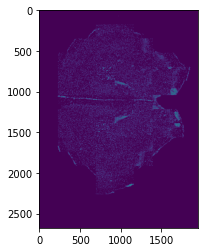

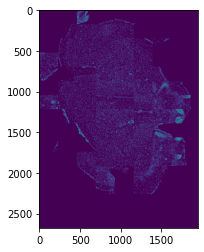

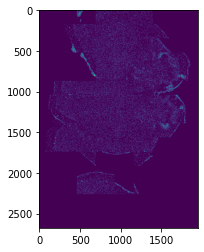

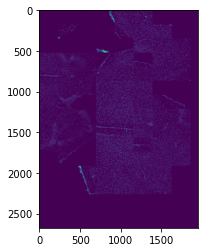

In [83]:
for path in Path("../../data/processed/").iterdir():
    locs = np.array([extract_locations(f) for f in files])
    full = merge_by_loc(path.glob("*.tif"), locs)
    plt.figure()
    plt.imshow(full[::4, ::4]);
    final_path = Path("../../data/final/") / (path.name + ".tif")
    tifffile.imwrite(final_path, data=full.astype(np.float32))